# Polar coding for any $N$ with array for speeding up
We develop the simplist Polar coding example assuming the length of code is $N$=2. This will be used for AI example using Tensorflow. We will see how new rx method imitate Polar.
- input을 꼬아 주어야 한다. 앞쪽에서 뺼때는 꼬여있어야 하기 때문이다.

## Common functions

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
from wireless import nb_polar

BER for each bit [0.75 0.25]
Auto: frozen_flag_n = [1 0]


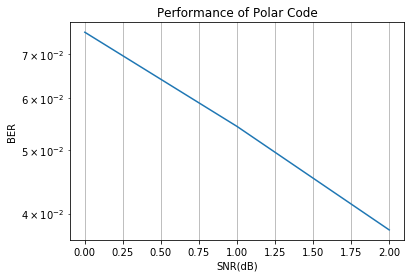

SNRdB_list, BER_list
[0, 1, 2] [0.0755, 0.0543, 0.0378]


In [4]:
polar = nb_polar.PolarCodeFrozen(N_code=2, K_code=1, frozen_flag='auto')
polar.run(SNRdB_list=list(range(3)), N_iter=10000, flag_fig=True)    

(0, 1)
[1 1 0 0]


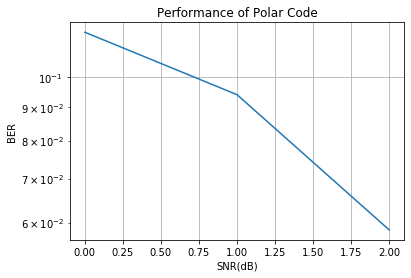

SNRdB_list, BER_list
[0, 1, 2] [0.117, 0.094, 0.0585]
(0, 2)
[1 0 1 0]


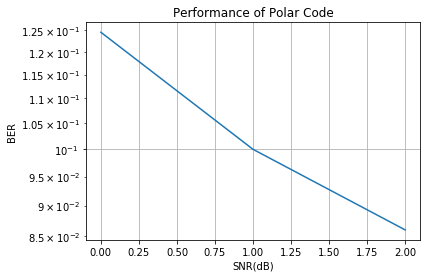

SNRdB_list, BER_list
[0, 1, 2] [0.1245, 0.1, 0.086]
(0, 3)
[1 0 0 1]


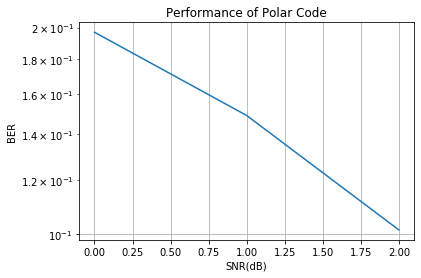

SNRdB_list, BER_list
[0, 1, 2] [0.197, 0.149, 0.1015]
(1, 2)
[0 1 1 0]


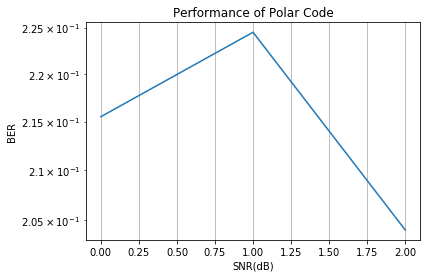

SNRdB_list, BER_list
[0, 1, 2] [0.2155, 0.2245, 0.204]
(1, 3)
[0 1 0 1]


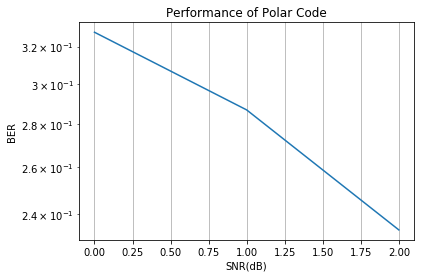

SNRdB_list, BER_list
[0, 1, 2] [0.328, 0.287, 0.2335]
(2, 3)
[0 0 1 1]


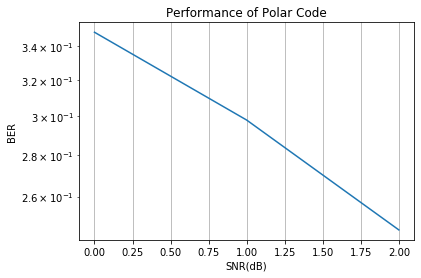

SNRdB_list, BER_list
[0, 1, 2] [0.3485, 0.298, 0.245]


([[0.117, 0.094, 0.0585],
  [0.1245, 0.1, 0.086],
  [0.197, 0.149, 0.1015],
  [0.2155, 0.2245, 0.204],
  [0.328, 0.287, 0.2335],
  [0.3485, 0.298, 0.245]],
 {'1100': 0.0585,
  '1010': 0.086,
  '1001': 0.1015,
  '0110': 0.204,
  '0101': 0.2335,
  '0011': 0.245})

In [28]:
N_code = 4 
K_code = 2 
ber_ll = []
forzen_d = {}
for frozen_idx in combinations(list(range(N_code)), K_code):
    frozen_flag_n = np.zeros(N_code, dtype=int)
    print(frozen_idx)
    frozen_idx_a = np.array(frozen_idx)
    frozen_flag_n[frozen_idx_a] = 1
    print(frozen_flag_n)
    polar = nb_polar.PolarCodeFrozen(N_code=N_code, K_code=K_code, frozen_flag_n=frozen_flag_n)
    ber_l  = polar.run(SNRdB_list=list(range(3)), N_iter=1000, flag_fig=True)    
    ber_ll.append(ber_l)
    frozen_str = ''.join([str(i) for i in frozen_flag_n])
    forzen_d[frozen_str] = ber_l[-1]
ber_ll, forzen_d

<StemContainer object of 3 artists>

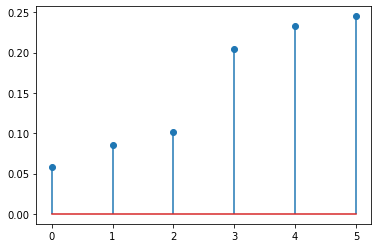

In [29]:
ber_aa = np.array(ber_ll)
plt.stem(ber_aa[:,2],use_line_collection=True)

In [26]:
''.join([str(i) for i in [1,1,0,1]])

'1101'

(0, 1, 2, 3)
[1 1 1 1 0 0 0 0]


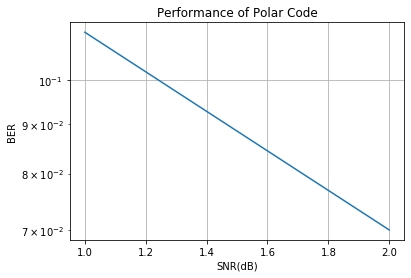

SNRdB_list, BER_list
[1, 2] [0.112, 0.07]
(0, 1, 2, 4)
[1 1 1 0 1 0 0 0]


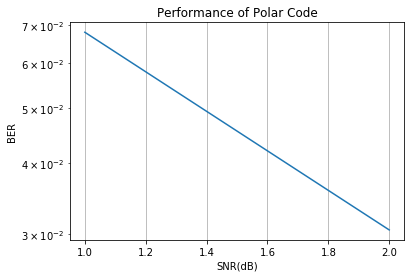

SNRdB_list, BER_list
[1, 2] [0.068, 0.0305]
(0, 1, 2, 5)
[1 1 1 0 0 1 0 0]


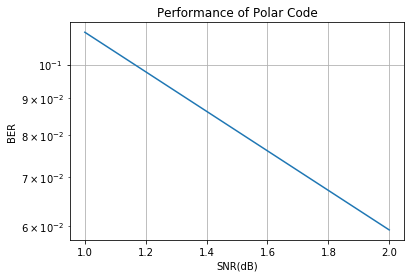

SNRdB_list, BER_list
[1, 2] [0.11075, 0.05925]
(0, 1, 2, 6)
[1 1 1 0 0 0 1 0]


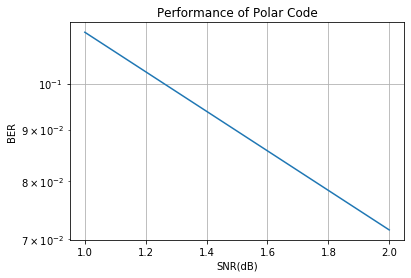

SNRdB_list, BER_list
[1, 2] [0.1125, 0.0715]
(0, 1, 2, 7)
[1 1 1 0 0 0 0 1]


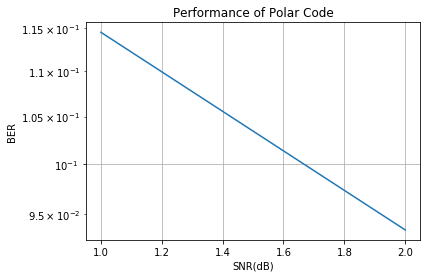

SNRdB_list, BER_list
[1, 2] [0.1145, 0.0935]
(0, 1, 3, 4)
[1 1 0 1 1 0 0 0]


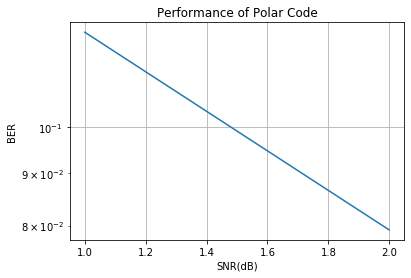

SNRdB_list, BER_list
[1, 2] [0.12375, 0.07925]
(0, 1, 3, 5)
[1 1 0 1 0 1 0 0]


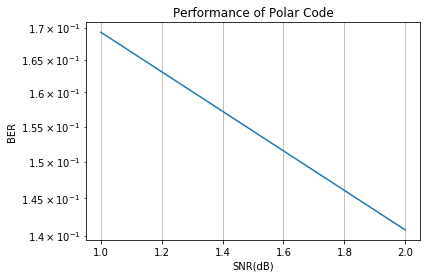

SNRdB_list, BER_list
[1, 2] [0.16925, 0.14075]
(0, 1, 3, 6)
[1 1 0 1 0 0 1 0]


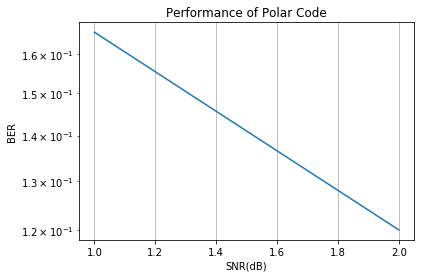

SNRdB_list, BER_list
[1, 2] [0.16575, 0.12]
(0, 1, 3, 7)
[1 1 0 1 0 0 0 1]


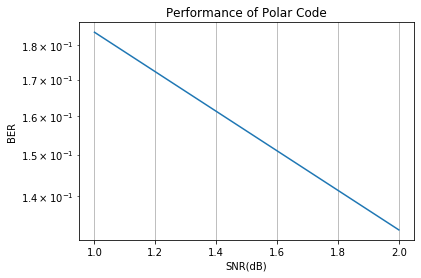

SNRdB_list, BER_list
[1, 2] [0.184, 0.13225]
(0, 1, 4, 5)
[1 1 0 0 1 1 0 0]


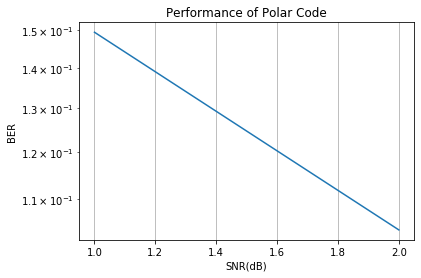

SNRdB_list, BER_list
[1, 2] [0.1495, 0.104]
[[0.112, 0.07], [0.068, 0.0305], [0.11075, 0.05925], [0.1125, 0.0715], [0.1145, 0.0935], [0.12375, 0.07925], [0.16925, 0.14075], [0.16575, 0.12], [0.184, 0.13225], [0.1495, 0.104]]
{'11110000': 0.07, '11101000': 0.0305, '11100100': 0.05925, '11100010': 0.0715, '11100001': 0.0935, '11011000': 0.07925, '11010100': 0.14075, '11010010': 0.12, '11010001': 0.13225, '11001100': 0.104}


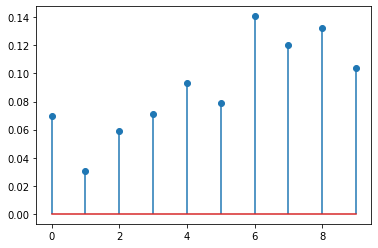

In [40]:
def polar_run_comb(N_code=8, K_code=4, max_cnt=None,
        SNRdB_list=list(range(1,3)), N_iter=1000, flag_fig=True): 
    ber_ll = []
    frozen_d = {}
    cnt = 0 
    for frozen_idx in combinations(list(range(N_code)), K_code):
        if max_cnt:
            if cnt == max_cnt:
                break
            else:
                cnt += 1
        frozen_flag_n = np.zeros(N_code, dtype=int)
        print(frozen_idx)
        frozen_idx_a = np.array(frozen_idx)
        frozen_flag_n[frozen_idx_a] = 1
        print(frozen_flag_n)
        polar = nb_polar.PolarCodeFrozen(N_code=N_code, K_code=K_code, frozen_flag_n=frozen_flag_n)
        ber_l  = polar.run(SNRdB_list=SNRdB_list, N_iter=N_iter, flag_fig=flag_fig)    
        ber_ll.append(ber_l)
        frozen_str = ''.join([str(i) for i in frozen_flag_n])
        frozen_d[frozen_str] = ber_l[-1]
    print(ber_ll)
    print(frozen_d)
    ber_aa = np.array(ber_ll)
    plt.stem(ber_aa[:,-1],use_line_collection=True)    
    return frozen_d

frozen_d = polar_run_comb(N_code=8, K_code = 4, max_cnt=10)

(0, 1, 2, 3, 4, 5, 6, 7)
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


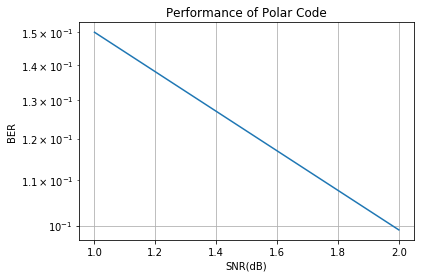

SNRdB_list, BER_list
[1, 2] [0.149875, 0.099125]
(0, 1, 2, 3, 4, 5, 6, 8)
[1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0]


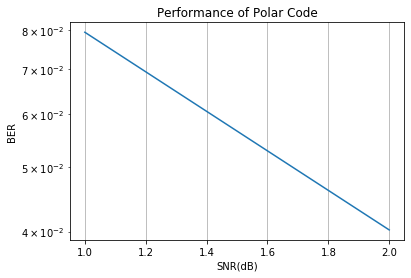

SNRdB_list, BER_list
[1, 2] [0.0795, 0.04025]
(0, 1, 2, 3, 4, 5, 6, 9)
[1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0]


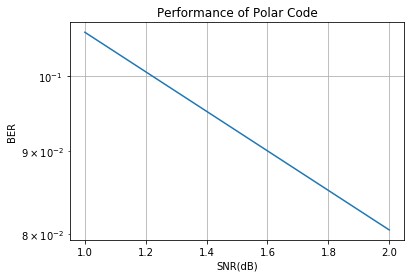

SNRdB_list, BER_list
[1, 2] [0.106375, 0.0805]
(0, 1, 2, 3, 4, 5, 6, 10)
[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0]


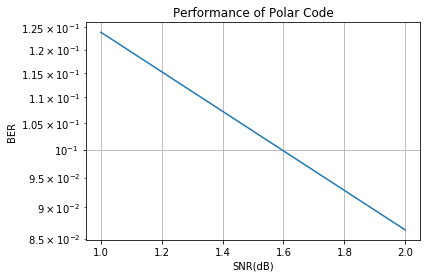

SNRdB_list, BER_list
[1, 2] [0.123875, 0.086375]
(0, 1, 2, 3, 4, 5, 6, 11)
[1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0]


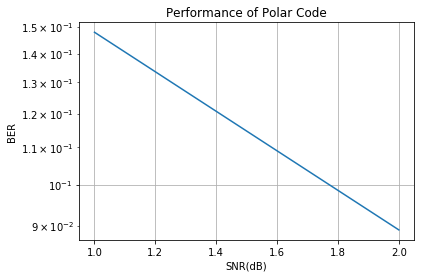

SNRdB_list, BER_list
[1, 2] [0.147875, 0.089]
(0, 1, 2, 3, 4, 5, 6, 12)
[1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0]


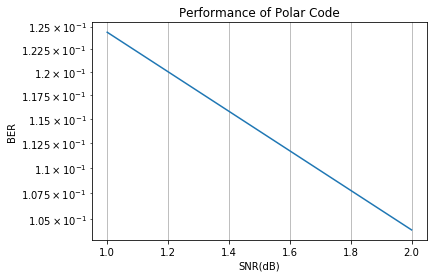

SNRdB_list, BER_list
[1, 2] [0.124375, 0.104]
(0, 1, 2, 3, 4, 5, 6, 13)
[1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0]


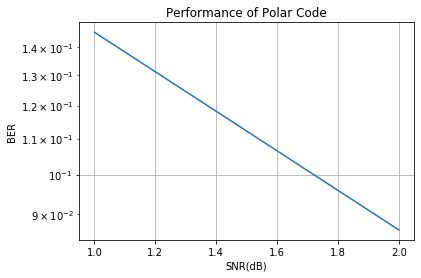

SNRdB_list, BER_list
[1, 2] [0.14575, 0.086375]
(0, 1, 2, 3, 4, 5, 6, 14)
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0]


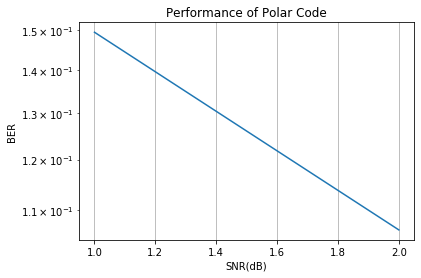

SNRdB_list, BER_list
[1, 2] [0.149375, 0.106375]
(0, 1, 2, 3, 4, 5, 6, 15)
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1]


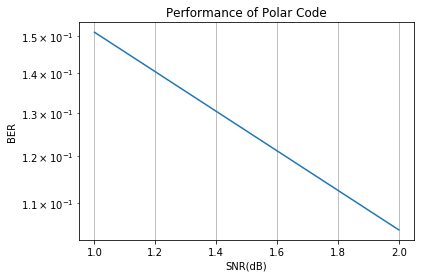

SNRdB_list, BER_list
[1, 2] [0.151, 0.10475]
(0, 1, 2, 3, 4, 5, 7, 8)
[1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0]


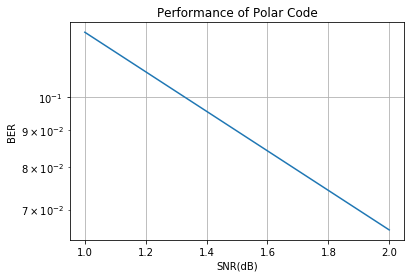

SNRdB_list, BER_list
[1, 2] [0.12275, 0.065625]
[[0.149875, 0.099125], [0.0795, 0.04025], [0.106375, 0.0805], [0.123875, 0.086375], [0.147875, 0.089], [0.124375, 0.104], [0.14575, 0.086375], [0.149375, 0.106375], [0.151, 0.10475], [0.12275, 0.065625]]
{'1111111100000000': 0.099125, '1111111010000000': 0.04025, '1111111001000000': 0.0805, '1111111000100000': 0.086375, '1111111000010000': 0.089, '1111111000001000': 0.104, '1111111000000100': 0.086375, '1111111000000010': 0.106375, '1111111000000001': 0.10475, '1111110110000000': 0.065625}


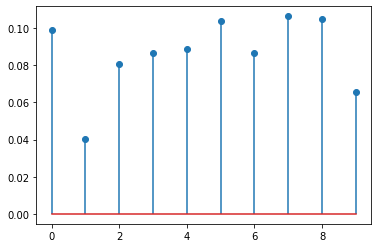

In [41]:
frozen_d = polar_run_comb(N_code=16, K_code = 8, max_cnt=10)